<a href="https://colab.research.google.com/github/KillerGlass/classifica-o-binaria-em-pytroch/blob/main/Classifica%C3%A7%C3%A3o_binaria_brest_cancer_com_valida%C3%A7%C3%A3o_cruzada_e_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas


In [ ]:
!pip install skorch==0.8.0
#pytroch n tem suporte para validação cruzada

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from skorch import NeuralNetBinaryClassifier
import torch
import torch.nn as nn
import seaborn as sns
import skorch
torch.__version__



'1.9.0+cu111'

In [ ]:
skorch.__version__

'0.8.0'

# Etapa 2 : Base de dados

In [ ]:
np.random.seed(123)
torch.manual_seed(123)




In [ ]:
prev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learnig/Bases/entradas_breast.csv')
target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learnig/Bases/saidas_breast.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


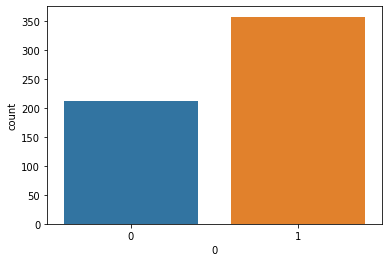

In [ ]:
sns.countplot(target['0'])

In [ ]:
prev = np.array(prev, dtype='float32')
target = np.array(target, dtype='float32').squeeze(1)

In [ ]:
target.shape

(569,)

# Etapa 3: Classe para entrada


In [ ]:
class classficador_torch(nn.Module):

  def __init__(self):
    super().__init__()
    self.densa0 = nn.Linear(30,16)
    #.weight = pesos
    torch.nn.init.uniform_(self.densa0.weight) #iniciando os pesos de maneira uniforme
    #passo necessario para validação cruzada
    self.activate0 = nn.ReLU( )

    #segunda camada
    self.densa1 = nn.Linear(16,16)
    torch.nn.init.uniform_(self.densa1.weight) 
    self.activate1 = nn.ReLU( )

    #terceira camada
    self.densa2 = nn.Linear(16,1)
    torch.nn.init.uniform_(self.densa2.weight) 
    self.output = nn.Sigmoid()

  def forward(self,x):

    x = self.densa0(x)
    x = self.activate0(x)

    x = self.densa1(x)
    x = self.activate1(x)

    x = self.densa2(x)
    x = self.output(x)

    return x


# Etapa 4: Skorch

In [ ]:
#torch nao e compativel com sklerarn, por isso se usa o skorch
#optimizer__weight_decay decaimento da taxa de aprendizagem
class_sklearn = NeuralNetBinaryClassifier(module= classficador_torch,
                                          criterion=torch.nn.BCELoss,
                                          optimizer=torch.optim.Adam,
                                          lr=0.001,
                                          optimizer__weight_decay=0.0001,
                                          max_epochs=100,
                                          batch_size=10,
                                          train_split=False)

# Etapa 5: Validação Cruzada

In [ ]:

result = cross_val_score(class_sklearn, prev, target, cv = 10, scoring= "accuracy")

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.0713
      2       37.1094  0.0588
      3       37.1094  0.0567
      4       37.1094  0.0580
      5       37.1094  0.0628
      6       37.1094  0.0595
      7       37.1094  0.0620
      8       37.1094  0.0556
      9       37.1094  0.0554
     10       37.1094  0.0565
     11       37.1094  0.0679
     12       37.1094  0.0579
     13       37.1094  0.0573
     14       37.1094  0.0538
     15       37.1094  0.0704
     16       37.1094  0.0573
     17       37.1094  0.0589
     18       37.1094  0.0562
     19       37.1094  0.0554
     20       37.1094  0.0560
     21       37.1094  0.0556
     22       37.1094  0.0563
     23       37.1094  0.0661
     24       37.1094  0.0693
     25       13.5893  0.0613
     26        0.5466  0.0615
     27        0.5314  0.0598
     28        0.4981  0.0536
     29        0.4820  0.0553
     30        0.4769  0.0611
     31        0.4528  0.0572
     32   

In [ ]:
result.shape

(10,)

In [ ]:
result

array([0.84210526, 0.61403509, 0.89473684, 0.63157895, 0.85964912,
       0.89473684, 0.87719298, 0.92982456, 0.63157895, 0.625     ])

In [ ]:
result.mean()

0.7800438596491228

# Etapa 6: Dropout

In [ ]:
#dropout evita overfittimg
# e uma tecnica onde vc zera alguns neuronios, para generalizar alguns dados
# vc zera baseada na porcentagem passada por parametro

In [ ]:
class classficador_torch(nn.Module):

  def __init__(self):
    super().__init__()
    self.densa0 = nn.Linear(30,16)
    #.weight = pesos
    torch.nn.init.uniform_(self.densa0.weight) #iniciando os pesos de maneira uniforme
    #passo necessario para validação cruzada
    self.activate0 = nn.ReLU( )
    self.dropout0 = nn.Dropout(0.2)

    #segunda camada
    self.densa1 = nn.Linear(16,16)
    torch.nn.init.uniform_(self.densa1.weight) 
    self.activate1 = nn.ReLU( )
    self.dropout1 = nn.Dropout(0.2)

    #terceira camada
    self.densa2 = nn.Linear(16,1)
    torch.nn.init.uniform_(self.densa2.weight) 
    self.output = nn.Sigmoid()

  def forward(self,x):

    x = self.densa0(x)
    x = self.activate0(x)
    x = self.dropout0(x)

    x = self.densa1(x)
    x = self.activate1(x)
    x = self.dropout1(x)

    x = self.densa2(x)
    x = self.output(x)

    return x


In [ ]:
result = cross_val_score(class_sklearn, prev, target, cv = 10, scoring= "accuracy")

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.0697
      2       37.1094  0.0605
      3       37.1094  0.0552
      4       37.1094  0.0581
      5       37.1094  0.0589
      6       37.1094  0.0613
      7       37.1094  0.0567
      8       37.1094  0.0550
      9       37.1094  0.0572
     10       37.1094  0.0553
     11       37.1094  0.0597
     12       37.1094  0.0553
     13       37.1094  0.0556
     14       37.1094  0.0552
     15       37.1094  0.0574
     16       37.1094  0.0568
     17       37.1094  0.0600
     18       37.1094  0.0569
     19       37.1094  0.0562
     20       37.1094  0.0568
     21       37.1094  0.0565
     22       37.1094  0.0608
     23       37.1094  0.0572
     24       37.1094  0.0555
     25       37.1094  0.0654
     26       12.0705  0.0540
     27        0.6367  0.0554
     28        0.6330  0.0573
     29        0.6313  0.0622
     30        0.6301  0.0605
     31        0.6291  0.0576
     32   

In [ ]:
result.mean()

0.8313596491228068